In [3]:
# Basic library importation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
# Dataframe importation
df = pd.read_csv('df2_eneigh_2024.csv')

# Drop unnecesary columns
df.drop(columns='Unnamed: 0', inplace=True)

# Verify correct importation
df

,folioviv,foliohog_x,entidad_x,ingreso_promedio,poca_variedad_alimentos,alimentacion_cereales,alimentacion_carne,alimentacion_huevo,alimentacion_pescado,telefono,celular,conex_inte,num_auto,tarjeta,pagotarjet,negcua,est_alim,est_trans,numren,edad_promedio,alfabetism,asis_esc,num_trabaj,discapacidad,tipo_viv,mat_pared,mat_pisos,num_cuarto,ab_agua,disp_elect,total_dispositivos,est_socio
0,100001901,1,Aguascalientes,45546.670000,0,7,3,7,0,0,1,1,3,0,0,0,5100,0,4,16,1.0,4,4,4,7,8,3,4,1,1,6,Upper-middle stratum
1,100001902,1,Aguascalientes,37666.670000,0,7,4,7,1,1,1,1,3,1,0,0,12000,0,4,34,1.0,4,4,4,1,8,3,4,1,1,6,Upper-middle stratum
2,100001904,1,Aguascalientes,19083.330000,1,7,7,7,0,1,1,1,3,0,0,0,4350,0,2,44,1.0,2,2,2,1,8,3,3,1,1,6,Upper-middle stratum
3,100001905,1,Aguascalientes,35700.000000,0,7,4,7,0,1,1,1,3,1,1,0,8000,0,4,28,1.0,4,4,4,1,8,3,3,1,1,7,Upper-middle stratum
4,100002501,1,Aguascalientes,43088.000000,0,7,3,3,2,1,1,1,1,1,0,0,12000,2000,4,19,1.0,4,4,4,4,8,3,3,1,1,4,Lower-middle stratum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182824,1906196675,1,Nuevo_Leon,73350.898434,0,7,4,6,2,0,1,1,3,1,0,0,9543,175,5,33,1.0,5,5,5,1,8,3,4,1,1,8,Upper-middle stratum
182825,1104006155,1,Guanajuato,37596.111565,0,7,6,1,0,1,1,1,3,1,0,0,11448,0,5,25,1.0,5,5,5,1,8,3,4,1,1,7,Upper-middle stratum
182826,2307502024,1,Quintana_Roo,40875.684852,0,3,5,3,0,0,1,1,2,0,0,0,3922,672,2,63,1.0,2,2,2,1,7,2,3,1,1,6,Upper-middle stratum
182827,3200508979,1,Zacatecas,35692.479585,0,7,3,2,0,0,1,1,3,1,0,0,2751,135,1,27,1.0,1,1,1,3,8,3,3,1,1,5,Upper-middle stratum


# 1st graph : socioeconomic status distribution
Let's see how many household exists within each stratus. Our goal is to see if our dataset is balanced or if there are some socioeconomic classes with few cases. 

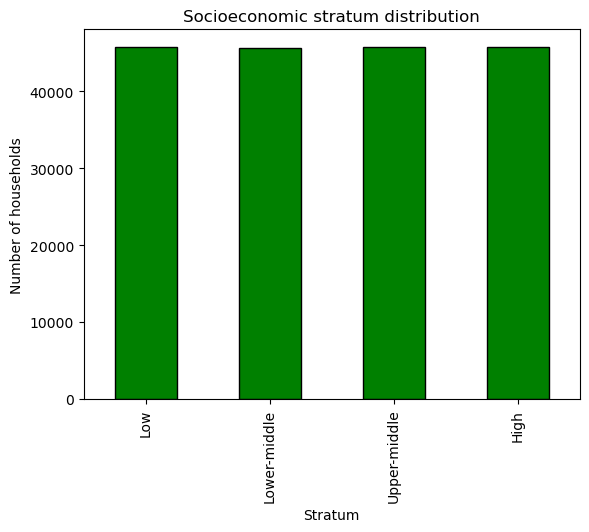

In [18]:
# Create Barplot
df['est_socio'].value_counts().sort_index().plot(kind='bar',color='Green',edgecolor='black')

# Adjust title and labels
plt.title('Socioeconomic stratum distribution')
plt.xlabel ('Stratum')
plt.ylabel('Number of households')
plt.xticks([0,1,2,3],['Low','Lower-middle','Upper-middle','High'])
plt.savefig('01_socioeconomic_stratum_distribution',bbox_inches='tight')

According to the graph, our data shows an equal number of households according to socioeconomic stratum. This is the magic of SMOTE, the technique we previously applied to balance our number of records according to the socioecnomic stratum.

# 2nd graph :  average income by socioeconomic stratum
How different is the average income between stratums? Let's dive into this question using a boxplot with seaborn. 

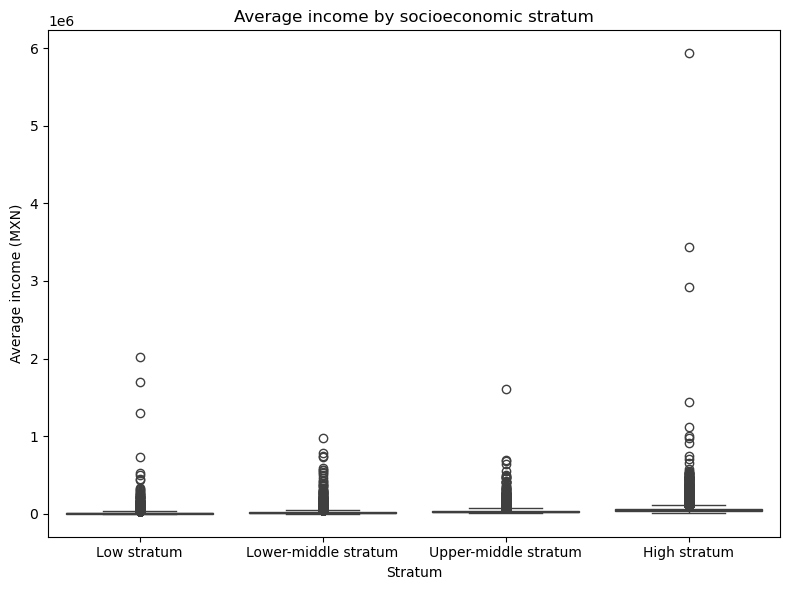

In [6]:
# Define order of boxplots
order = ["Low stratum", "Lower-middle stratum", "Upper-middle stratum", "High stratum"]

# Define boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="est_socio", y="ingreso_promedio", data=df, order=order)

# Define title and labels
plt.title('Average income by socioeconomic stratum')
plt.xlabel('Stratum')
plt.ylabel('Average income (MXN)')
plt.tight_layout()
plt.show()

Since we have an enourmous amount of outliers in each stratum, we will filter them using quantile 95. This means we will show data that is below the 95% of our data. 

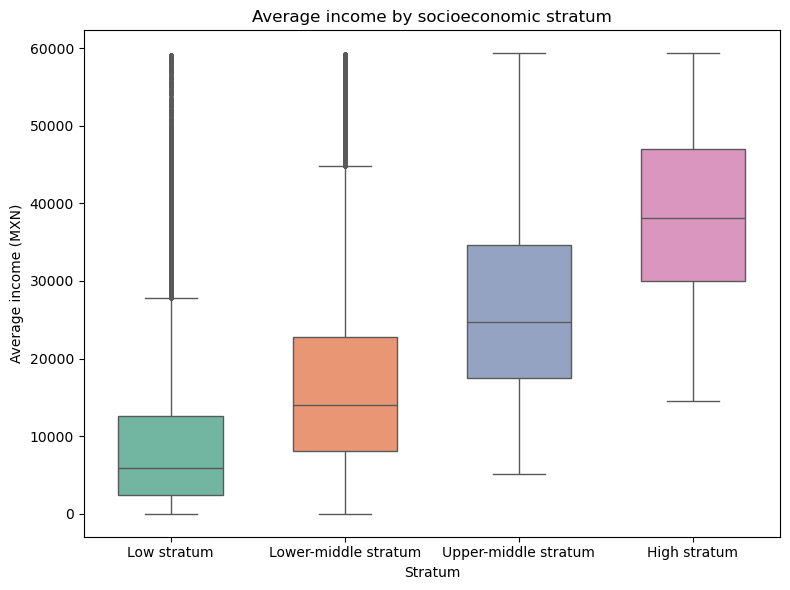

In [15]:
# Define quantile 90
q90 = df['ingreso_promedio'].quantile(0.90)

# Filter by q90
df_filtrado = df[df['ingreso_promedio'] < q90]

# Define order of boxplots
order = ["Low stratum", "Lower-middle stratum", "Upper-middle stratum", "High stratum"]

# Define boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="est_socio", y="ingreso_promedio", data=df_filtrado, order=order,
           palette='Set2', width=0.6,fliersize=2)

# Define title and labels
plt.title('Average income by socioeconomic stratum')
plt.xlabel('Stratum')
plt.ylabel('Average income (MXN)')
plt.tight_layout()
plt.savefig('02_average_income_by_socioeconomic-stratum')

The boxplot now shows a better relationship between average income and stratum. Although it may seem obvious that the upper stratum tends to have higher incomes than the lower stratum, it is necessary to confirm this data. Now the question is: Why are there people in the lower socioeconomic stratum who have high average incomes and are still considered lower class? It should be noted that the socioeconomic stratum defined by the 2010 Population and Housing Census takes into account other variables related to housing characteristics to define the type of class. This is why there are people in the lower stratum who may have incomes similar to those of someone in the upper stratum.

# 3rd graph: floor material by socioeconomic stratum

We will use a stacked bar chart to see how floor material changes depending on the socioeconomic stratum. 


<Figure size 800x600 with 0 Axes>

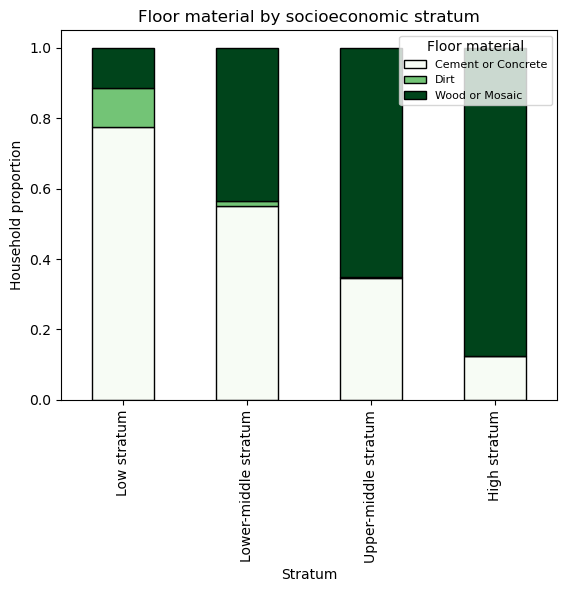

In [19]:
# Replace numbers in mat_pisos by names
df['mat_pisos'].replace({1:'Dirt', 2:'Cement or Concrete',
                        3:'Wood or Mosaic'}, inplace=True)

# Create figure 
plt.figure(figsize=(8,6))


# Define order
order = ["Low stratum", "Lower-middle stratum", "Upper-middle stratum","High stratum"]

# Create cross table
cross = pd.crosstab(df["est_socio"], df["mat_pisos"], normalize="index").reindex(order)


# Plot the crossbar       
cross.plot(kind="bar", stacked=True, cmap="Greens", edgecolor="black")

# Set title and labels
plt.title("Floor material by socioeconomic stratum")
plt.xlabel("Stratum")
plt.ylabel("Household proportion")
plt.legend(title="Floor material", loc='best', fontsize=8)
plt.savefig('03_floor_material_by_socioeconomic_stratum',bbox_inches='tight')

According to the stacked bar chart, the household floor material differs between socioeconomic strata. Dirt material is practically only present in low and lower-middle stratums, while wood or mosaic material are more common in higher stratums. 

# 4th graph: car pocession according to socioecnomic stratum


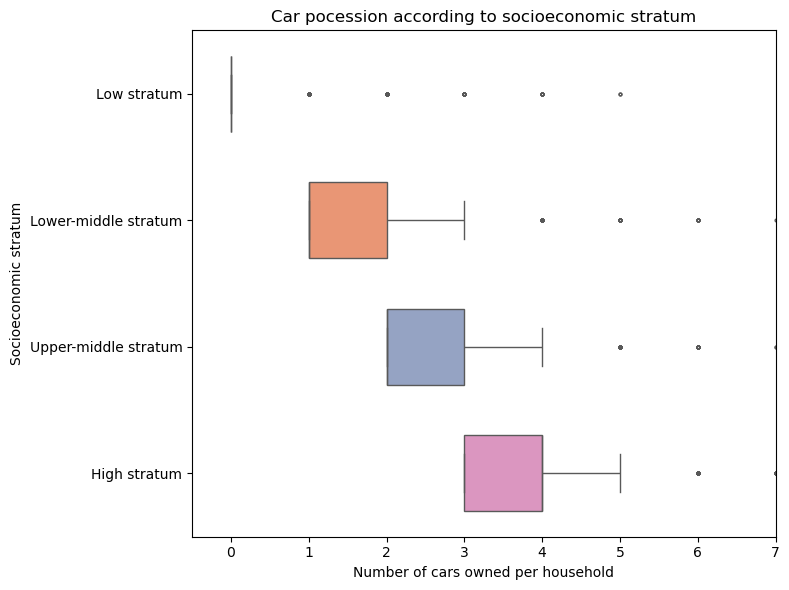

In [17]:
# Define order of boxplots
order = ["Low stratum", "Lower-middle stratum", "Upper-middle stratum", "High stratum"]

# Define boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y="est_socio", x="num_auto", data=df, order=order,
           palette='Set2', width=0.6,fliersize=2)

# Define title and labels
plt.title('Car pocession according to socioeconomic stratum')
plt.xlabel('Number of cars owned per household')
plt.ylabel('Socioeconomic stratum')
plt.xlim(-0.5,7)
plt.tight_layout()
plt.savefig('04_car_pocession_according_to_socioeconomic_stratum')

According to the graph, the high socioeconomic stratum has around 3 to 4 cars, while the low stratum has practically 0 cars per household.